<a href="https://colab.research.google.com/github/RobotKitchen/AppleCounting/blob/main/Approach2_MachineTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Detection for Apples

## CNN from scratch

## Load data + Processing

From Minneapple dataset uploaded to drive

In [ ]:
from google.colab import drive
# it will link to your google drive and may ask you to go through a verification step
drive.mount('/content/drive') 

Mounted at /content/drive


Load relevant libraries

Using the [Minneapple dataset](https://conservancy.umn.edu/handle/11299/206575) loaded into drive

In [ ]:
from pathlib import Path
import numpy as np
import joblib                           #What was this one for?
from keras.preprocessing import image as keras_image
from keras.applications import vgg16
import pandas as pd                     # Opening the labels file
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import keras

# Path to folders with training data
apple_path = "/content/drive/MyDrive/Data/counting/train/images"
apple_cat_path = "/content/drive/MyDrive/Data/counting/train/train_ground_truth.txt"
images = []
labels = []

Load the category data or _labels_

In [ ]:
df = pd.read_csv(apple_cat_path)
#Weird error on this particular image for some reason. Exclude from the set
df = df[df.Image != 'images_26100.png']

#print(df)

#The dataset has 64595 images, use first x images instead

number_of_pics = 26099//2
output_neurons = 7

if number_of_pics >= 30000:
  #BOY
  # Do all of them
  pass
elif output_neurons == 1: 
  pieces = [df[df['count'] == 0].head(number_of_pics), 
          df[df['count'] == 1].head(number_of_pics)]
  df = pd.concat(pieces)
else:
  pieces = []
  for n in range(output_neurons):
    pieces.append(df[df['count'] == n].head(number_of_pics))
  df = pd.concat(pieces)



Load Minneapple images into the training var based on the previously selected data

In [ ]:
for img_name in df['Image']:

  image_path = (apple_path + '/' + img_name)
  #print(image_path)
  # Load the image from disk and process into the VGG format (image.load_img)
  img = keras_image.load_img(image_path,target_size = (64,64))
  #print(img)
  # Convert the image to a numpy array
  image_array = keras_image.img_to_array(img)/255

  # Add the image to the list of images
  images.append(image_array)

  if(len(images)==1):
    print('Loading start')

  #Show progress
  if(len(images)%(len(df['Image'])//100)==0): #Print progress in 1%...
    print(str(len(images)) + ' pics out of ' + str(len(df['Image'])))
print('Loading done')

labels = (df.drop('Image', axis=1).values)


Loading start
645 pics out of 64594
1290 pics out of 64594
1935 pics out of 64594
2580 pics out of 64594
3225 pics out of 64594
3870 pics out of 64594
4515 pics out of 64594
5160 pics out of 64594
5805 pics out of 64594
6450 pics out of 64594
7095 pics out of 64594
7740 pics out of 64594
8385 pics out of 64594
9030 pics out of 64594
9675 pics out of 64594
10320 pics out of 64594
10965 pics out of 64594
11610 pics out of 64594
12255 pics out of 64594
12900 pics out of 64594
13545 pics out of 64594
14190 pics out of 64594
14835 pics out of 64594
15480 pics out of 64594
16125 pics out of 64594
16770 pics out of 64594
17415 pics out of 64594
18060 pics out of 64594
18705 pics out of 64594
19350 pics out of 64594
19995 pics out of 64594
20640 pics out of 64594
21285 pics out of 64594
21930 pics out of 64594
22575 pics out of 64594
23220 pics out of 64594
23865 pics out of 64594
24510 pics out of 64594
25155 pics out of 64594
25800 pics out of 64594
26445 pics out of 64594
27090 pics out of 

Check just in case, show one image per class


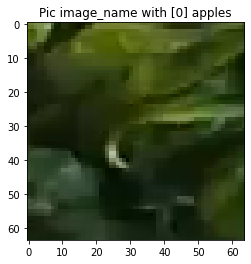

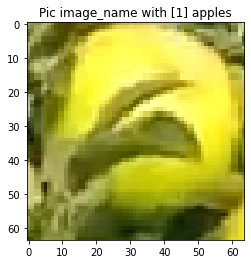

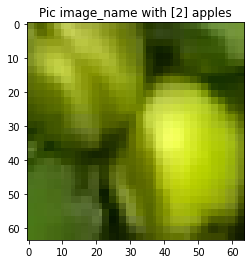

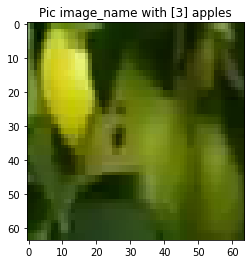

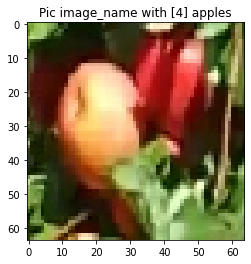

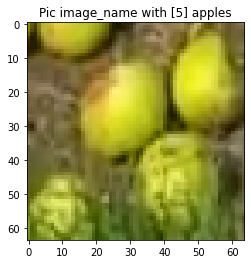

In [ ]:
"""
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(img,cmap="gray")
plt.title("greyscale")
plt.subplot(1,2,2)
plt.imshow(equ,cmap="gray")
plt.title("hist equalised")
"""
sub_div = len(df)//6
for i in range(len(df)//sub_div):
    # Grab an image from the data set
    sample_image = images[i*sub_div]
    image_class_name = labels[i*sub_div]
    #image_name = df.Image[i*sub_div]
    #image_path = (apple_path + '/' + img_name)
    
    # Grab the image's expected class id
    #image_class_number = labels[i][0]
    # Look up the class name from the class id
    #image_class_name = cifar10_class_names[image_class_number]
  
    # Draw the image as a plot
    plt.imshow(sample_image, cmap=plt.cm.binary)
    # Label the image
    plt.title('Pic ' + 'image_name' + ' with ' + str(image_class_name) + ' apples')
    # Show the plot on the screen
    plt.show()

Finish the data and package

In [ ]:

# Create a single numpy array with all the images we loaded
x_train = np.array(images)

# Also convert the labels to a numpy array
y_train = np.array(labels)
# And preprocess
y_train = keras.utils.to_categorical(y_train, output_neurons)


Dump features for retraining

In [ ]:

# Save the array of extracted features to a file
joblib.dump(x_train, "x_train.dat")
# Save the matching array of expected values to a file
joblib.dump(y_train, "y_train.dat")


['y_train.dat']

## Training

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from pathlib import Path
import joblib

# Load data set
x_train = joblib.load("x_train.dat")
y_train = joblib.load("y_train.dat")


# Create a model and add layers
model = Sequential()

#Input layer with the 64x64 images 
# TODO: CHANGE TO VARIABLE RESOLUTION

#Input
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(64, 64, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))

#For number of apples we need more neurons than one
model.add(Dense(output_neurons, activation='sigmoid'))      

#Show summary
#model.summary()

# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

# Train the model
model.fit(
    x_train,
    y_train,
    epochs=12,
    shuffle=True
)

# Save neural network structure
model_structure = model.to_json()
f = Path("/content/drive/MyDrive/Data/model_structure.json")
f.write_text(model_structure)

# Save neural network's trained weights
model.save_weights("/content/drive/MyDrive/Data/model_weights.h5")


Epoch 1/12
2019/2019 [==============================] - 1189s 589ms/step - loss: 0.3205 - accuracy: 0.4284
Epoch 2/12
2019/2019 [==============================] - 1208s 598ms/step - loss: 0.1634 - accuracy: 0.7639
Epoch 3/12
2019/2019 [==============================] - 1201s 595ms/step - loss: 0.1146 - accuracy: 0.8448
Epoch 4/12
2019/2019 [==============================] - 1192s 590ms/step - loss: 0.0922 - accuracy: 0.8797
Epoch 5/12
2019/2019 [==============================] - 1184s 586ms/step - loss: 0.0780 - accuracy: 0.9013
Epoch 6/12
2019/2019 [==============================] - 1189s 589ms/step - loss: 0.0705 - accuracy: 0.9126
Epoch 7/12
2019/2019 [==============================] - 1186s 588ms/step - loss: 0.0636 - accuracy: 0.9229
Epoch 8/12
2019/2019 [==============================] - 1187s 588ms/step - loss: 0.0569 - accuracy: 0.9338
Epoch 9/12
2019/2019 [==============================] - 1196s 592ms/step - loss: 0.0559 - accuracy: 0.9336
Epoch 10/12
2019/2019 [==============

##Testing & Validation

Yes, I know this is the validation data. Just using for testing

In [ ]:

# Path to folders with training data
apple_path = "/content/drive/MyDrive/Data/counting/val/images"
apple_cat_path = "/content/drive/MyDrive/Data/counting/val/val_ground_truth.txt"
images_test = []
labels_test = []

df = pd.read_csv(apple_cat_path)

if output_neurons == 1 : 
  pieces = [df[df['count'] == 0].head(number_of_pics), 
          df[df['count'] == 1].head(number_of_pics)]
else:
  pieces = []
  for n in range(output_neurons):
    pieces.append(df[df['count'] == n].head(number_of_pics))

df = pd.concat(pieces)
labels_test = (df.drop('Image', axis=1).values)


for img_name in df['Image']:
  image_path = (apple_path + '/' + img_name)
  #print(image_path)
  # Load the image from disk and process into the VGG format (image.load_img)
  img = keras_image.load_img(image_path,target_size = (64,64))
  #print(img)
  # Convert the image to a numpy array
  image_array = keras_image.img_to_array(img)/255

  # Add the image to the list of images
  images_test.append(image_array)

  #Show progress
  if(len(images_test)%(len(df['Image'])/20)==0):
    print(str(len(images_test)) + ' pics out of ' + str(len(df['Image'])))
print('Loading done')

679 pics out of 3395
1358 pics out of 3395
2037 pics out of 3395
2716 pics out of 3395
3395 pics out of 3395
Loading done


### Format data

In [ ]:
# Create a single numpy array with all the images we loaded
x_test = np.array(images_test)

# Also convert the labels to a numpy array
y_test = np.array(labels_test)
y_test = keras.utils.to_categorical(y_test, output_neurons)


### Load existing model and weights

In [ ]:
# Load the json file that contains the model's structure
f = Path("model_structure(2).json")
model_structure = f.read_text()

# Recreate the Keras model object from the json data
model = model_from_json(model_structure)

# Re-load the model's trained weights
model.load_weights("model_weights(2).h5")

#model.validate()
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)


### Evaluation


In [ ]:
test_error_rate = model.evaluate(x_test, y_test, verbose=2, batch_size=128)

###Generate predictions based on validation data

In [ ]:
# Generate predictions
predictions = model.predict(x_test)

###Examples of validation data with predictions


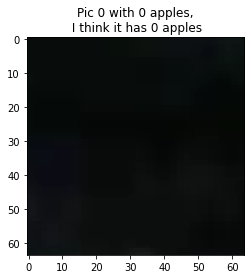

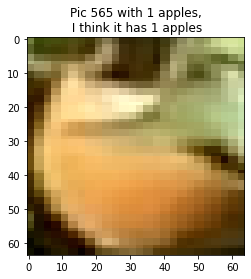

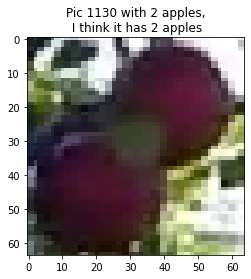

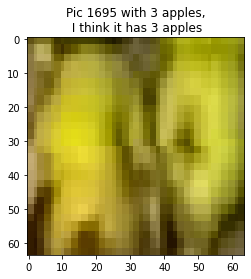

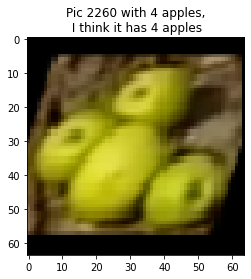

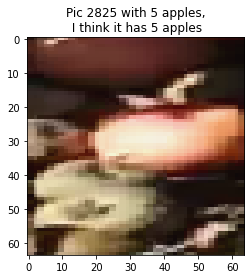

In [ ]:
sub_div = len(df)//6
for i in range(len(df)//sub_div):
    # Grab an image from the data set
    sample_image = images_test[i*sub_div]
    image_class_name = labels_test[i*sub_div,0]
    #image_name = df.Image[i*sub_div]
    #image_path = (apple_path + '/' + img_name)
    
    # Grab the image's expected class id
    #image_class_number = labels_test[i][0]
    # Look up the class name from the class id
    #image_class_name = cifar10_class_names[image_class_number]
  
    # Draw the image as a plot
    plt.imshow(sample_image, cmap=plt.cm.binary)
    # Label the image
    plt.title('Pic ' + str(i*sub_div) + ' with ' + str(image_class_name) + ' apples,\n I think it has ' + str(np.argmax(y_test[i*sub_div])) + ' apples')
    # Show the plot on the screen
    plt.show()

Rough testing

In [ ]:

n_right = 0
n_wrong = 0
wrong_lst = []

#Compare with actual results
for i in range(len(predictions)):
  if np.argmax(predictions[i,:]) == np.argmax(y_test[i]):
    n_right = n_right+1
  else:
    n_wrong = n_wrong+1
    wrong_lst.append(i)


print('We have ' + str(n_right) + ' right guesses')
print('and ' + str(n_wrong) + ' wrong guesses')


We have 3174 right guesses
and 221 wrong guesses


In [ ]:

#X_test = test_data_df.drop('total_earnings', axis=1).values
#Y_test = test_data_df[['total_earnings']].values

print('Using ' + str(output_neurons*number_of_pics) + ' pictures and ' + str(output_neurons) + ' output neurons')
test_error_rate = model.evaluate(x_test, y_test, verbose=0)
print("The accuracy for the test data set is: {} %".format(test_error_rate[1]))

Using 91343 pictures and 7 output neurons
The accuracy for the test data set is: 0.9349042773246765 %


###Just for fun, the wrong guesses

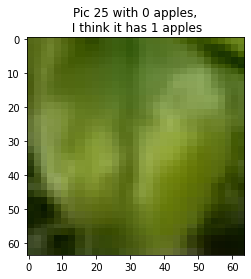

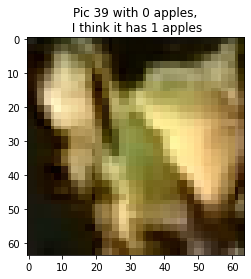

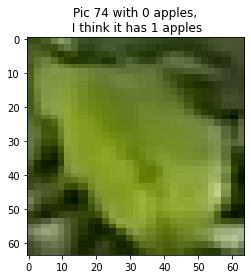

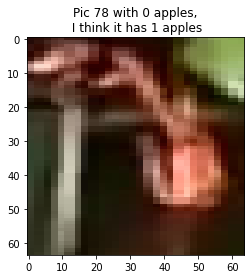

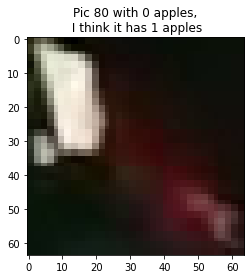

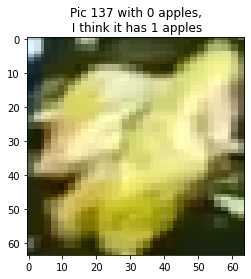

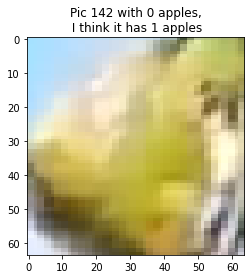

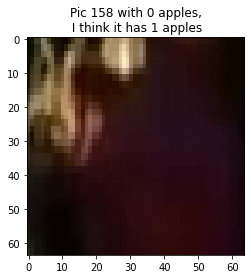

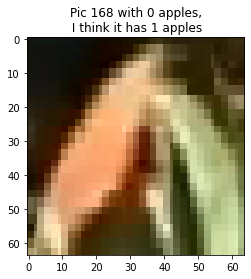

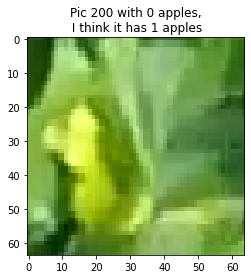

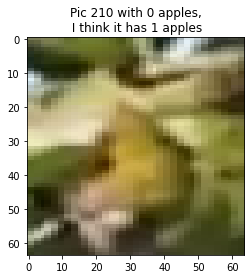

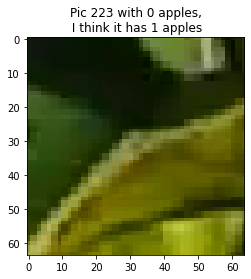

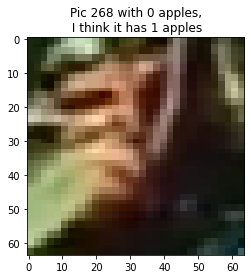

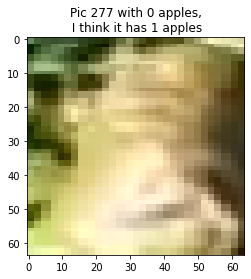

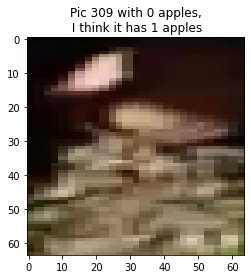

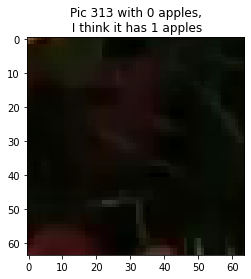

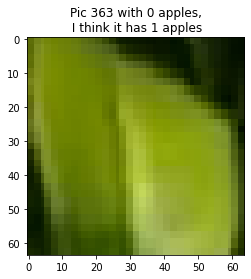

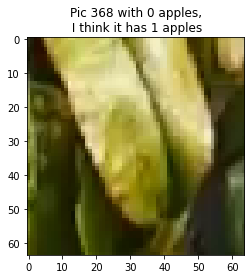

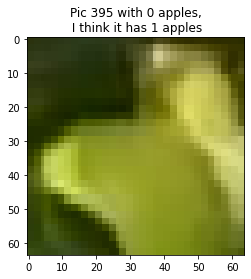

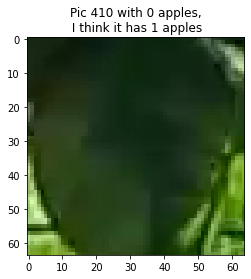

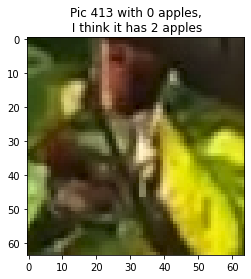

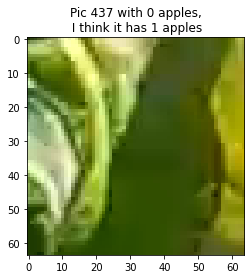

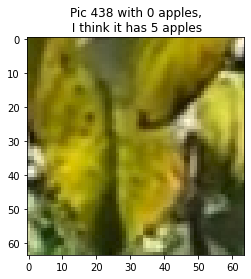

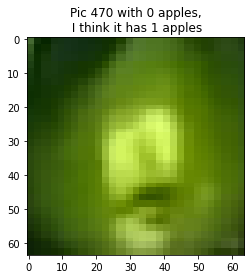

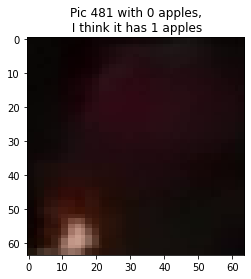

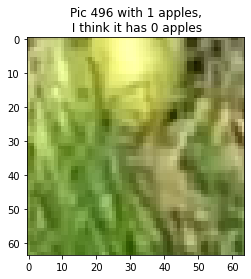

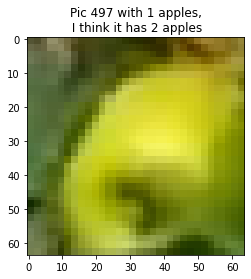

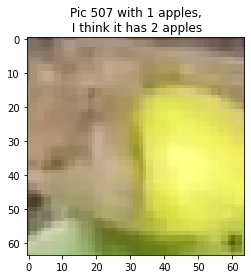

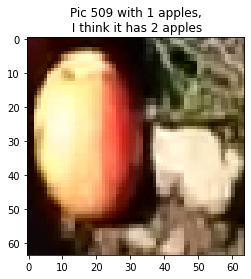

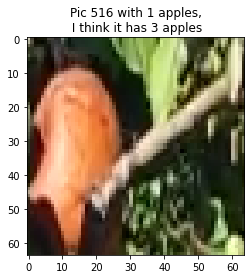

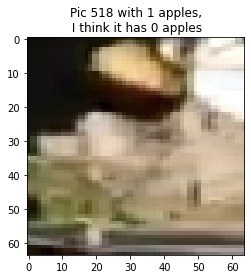

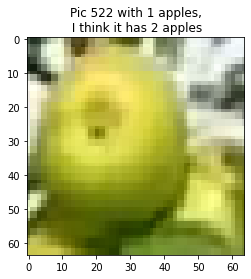

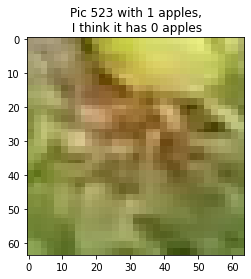

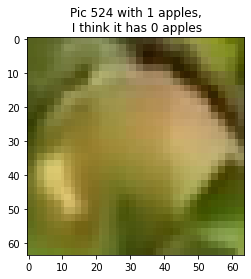

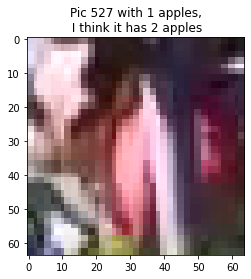

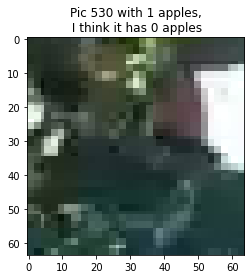

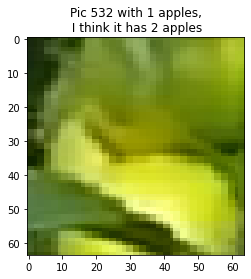

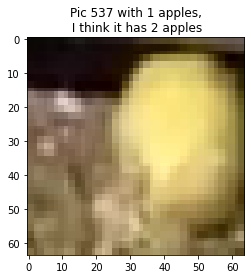

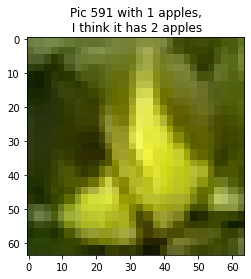

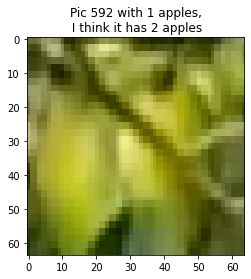

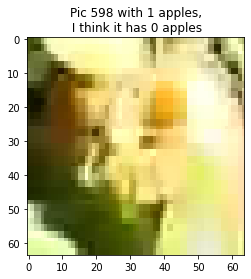

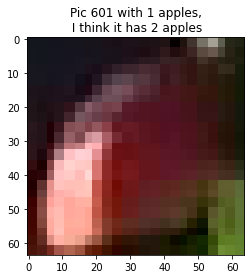

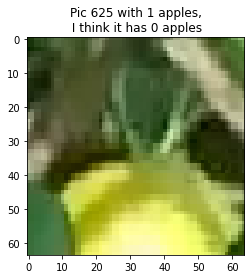

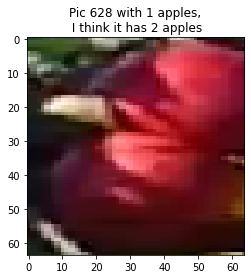

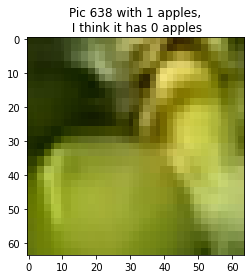

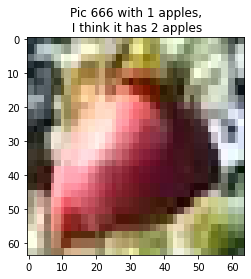

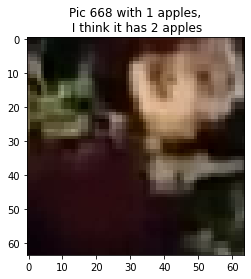

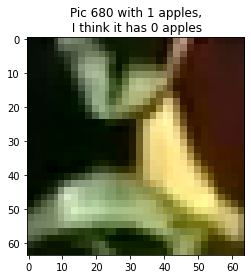

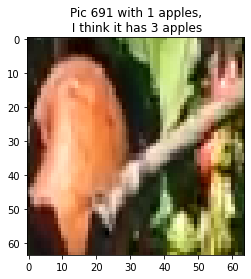

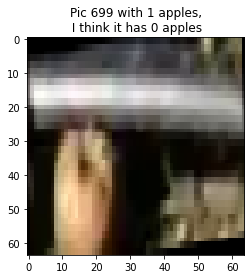

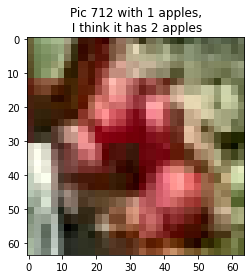

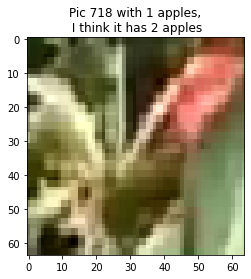

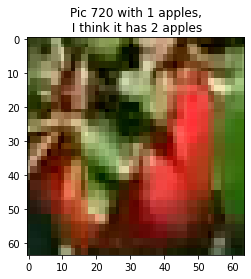

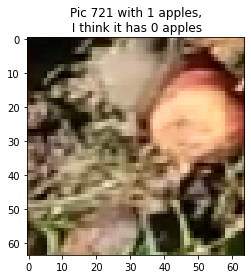

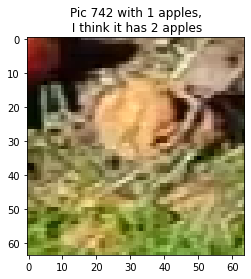

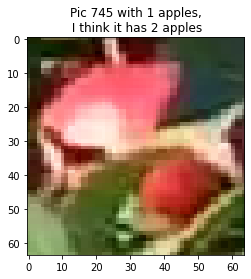

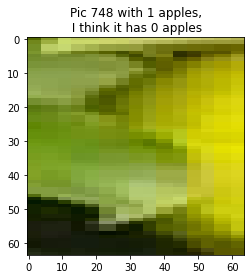

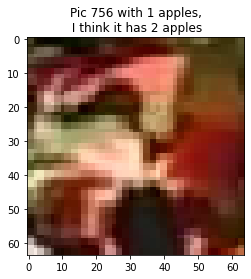

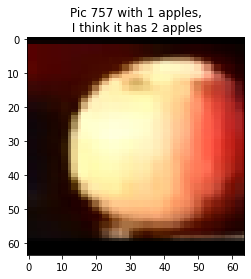

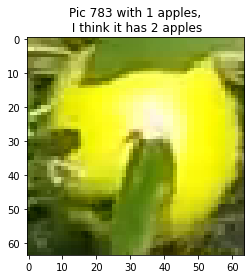

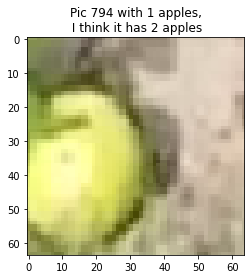

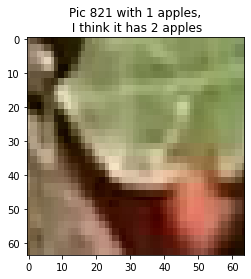

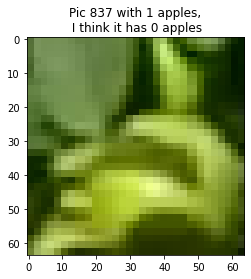

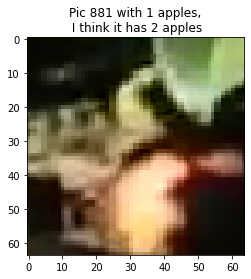

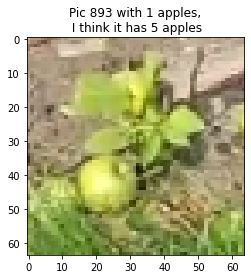

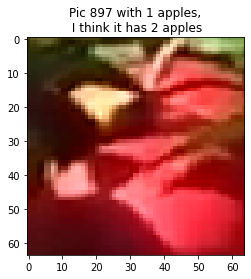

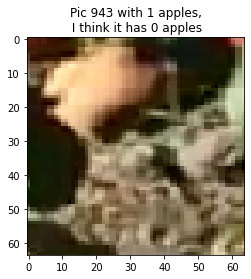

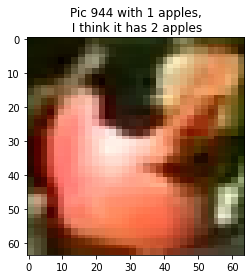

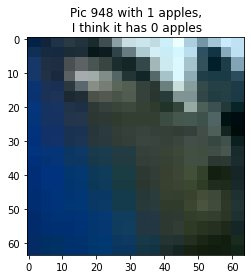

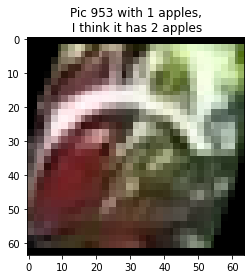

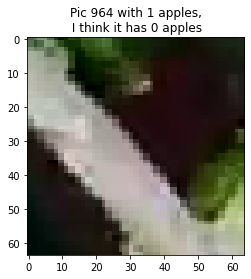

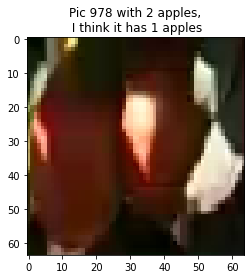

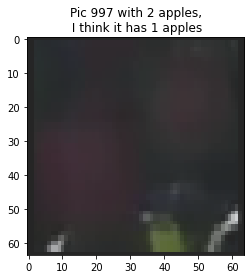

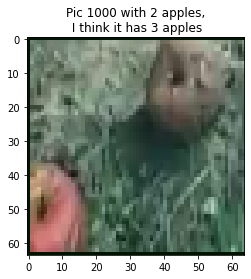

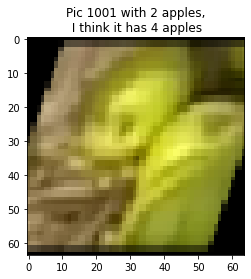

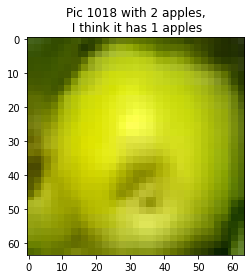

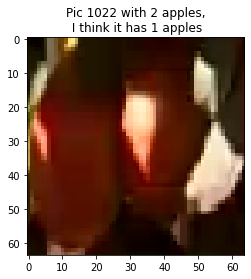

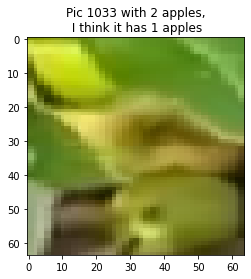

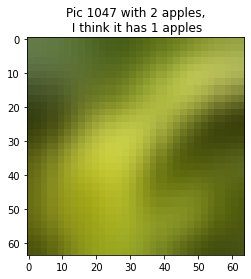

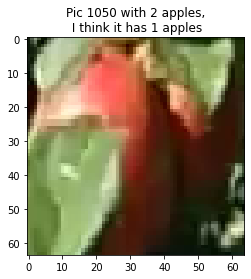

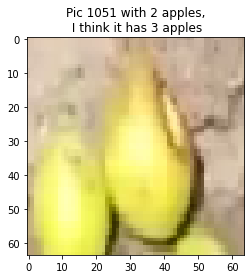

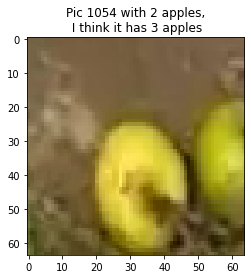

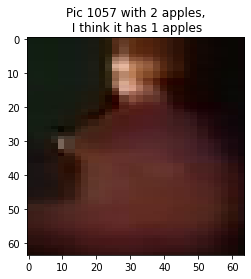

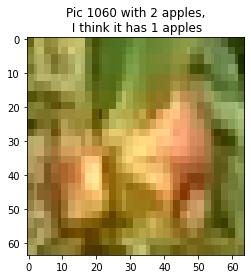

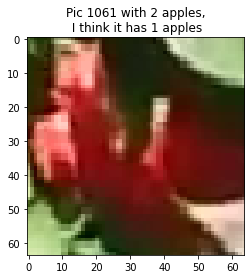

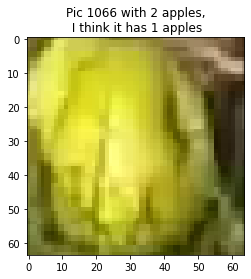

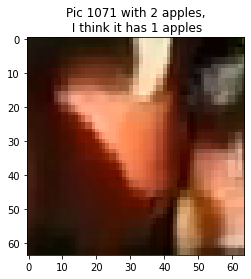

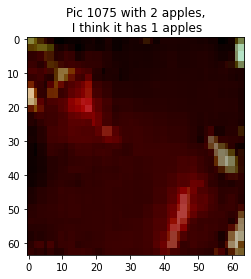

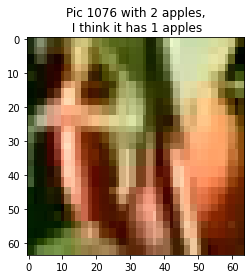

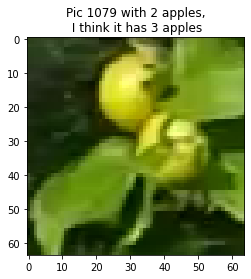

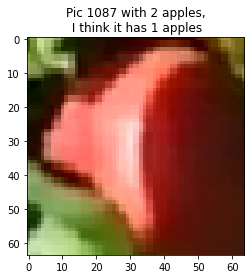

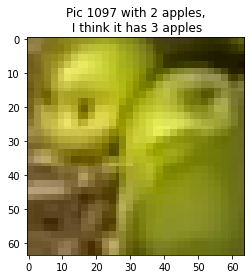

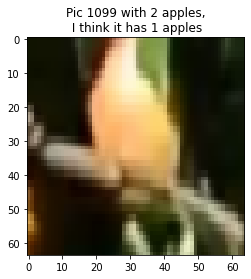

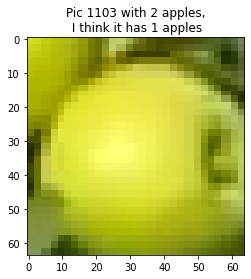

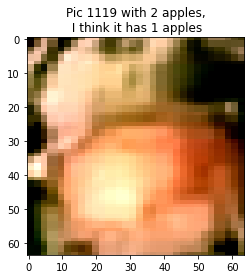

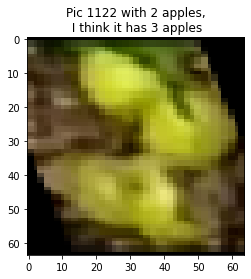

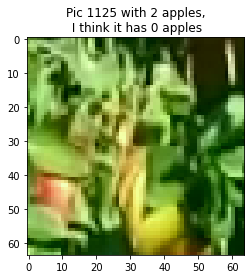

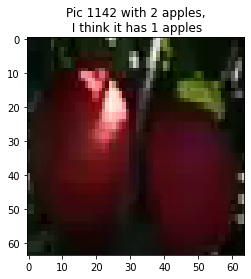

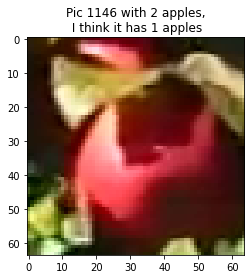

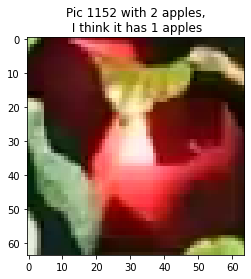

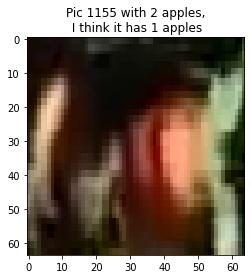

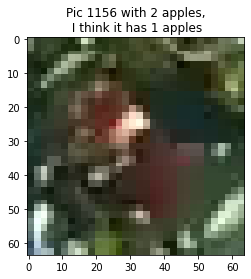

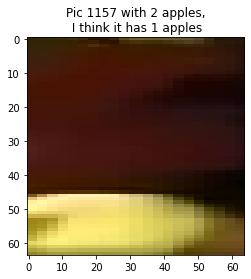

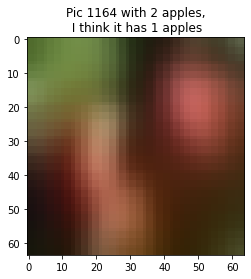

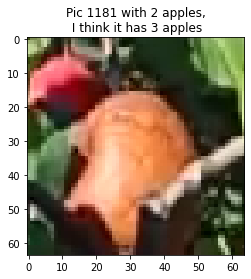

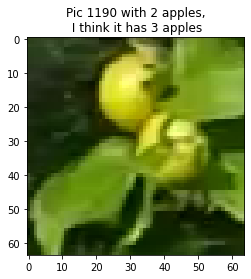

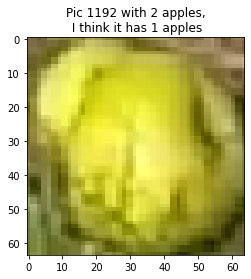

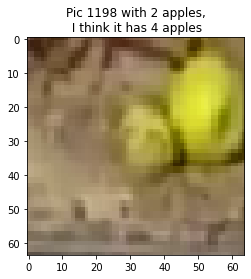

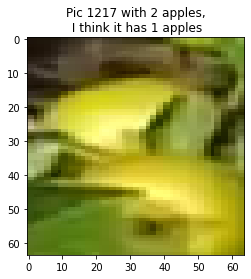

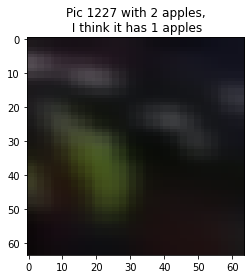

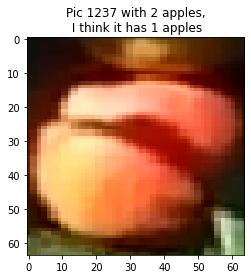

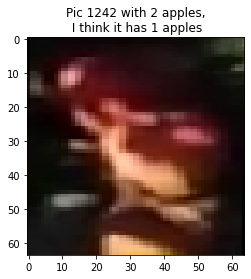

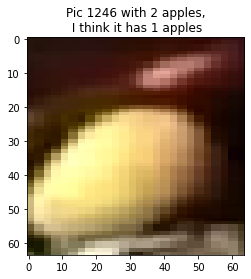

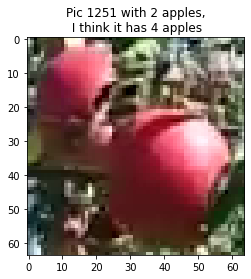

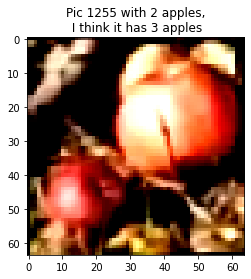

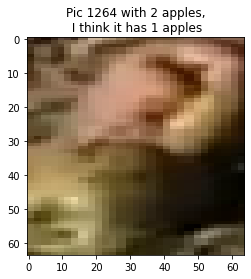

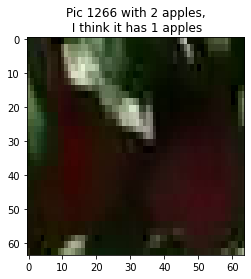

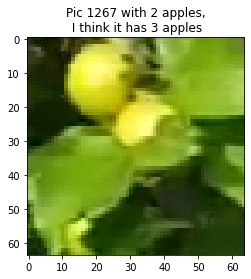

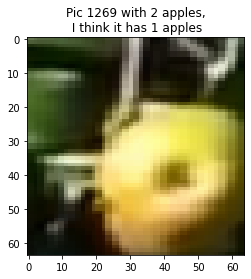

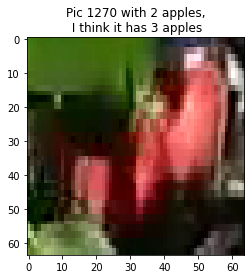

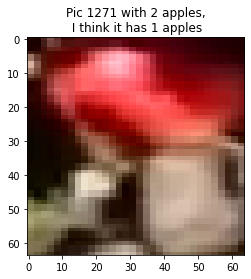

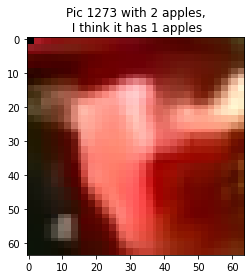

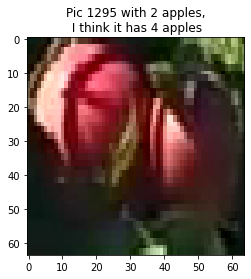

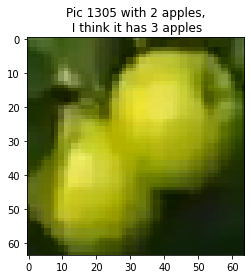

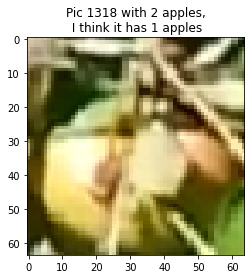

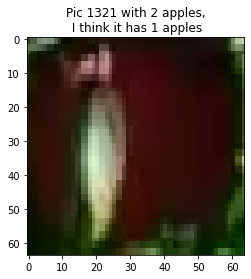

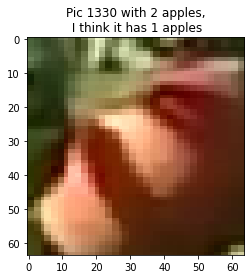

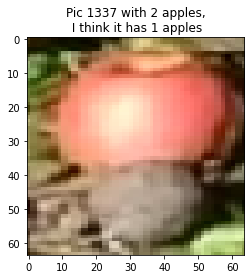

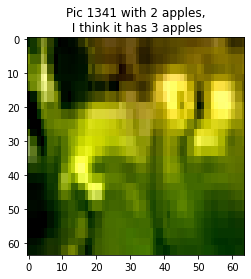

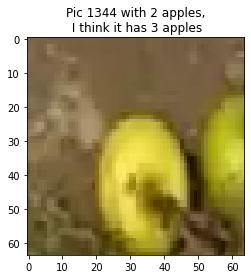

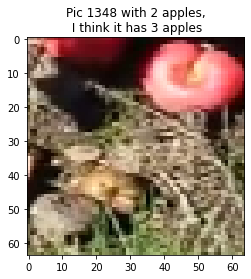

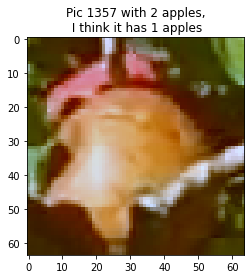

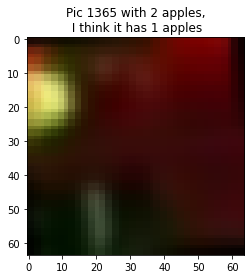

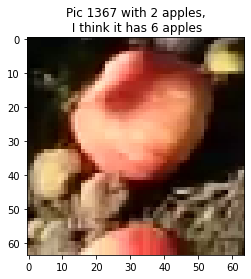

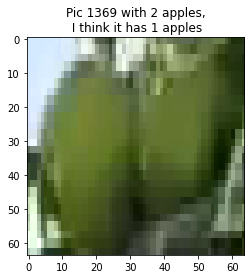

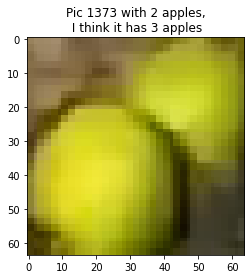

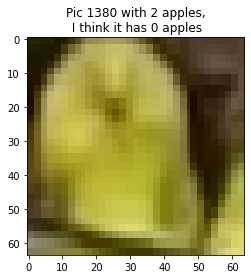

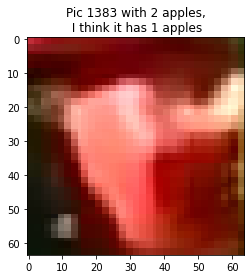

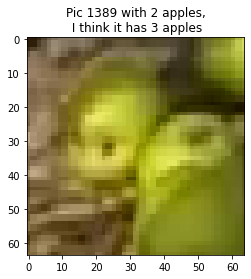

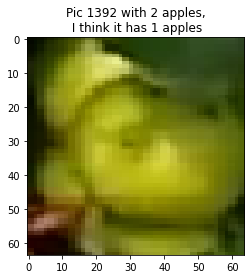

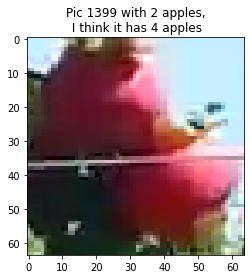

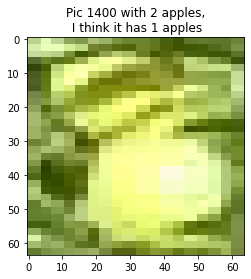

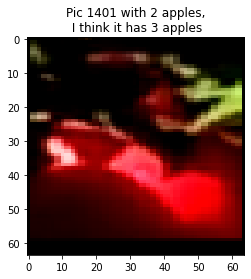

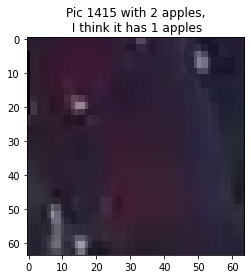

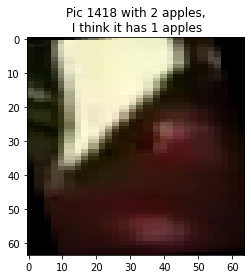

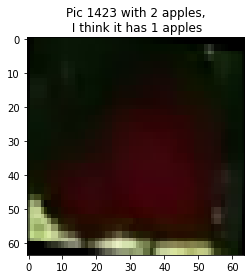

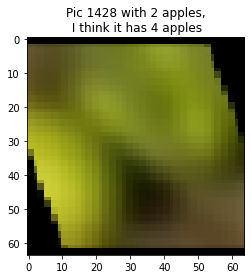

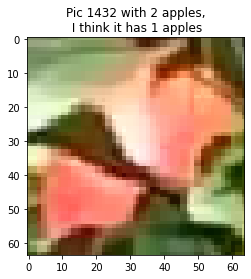

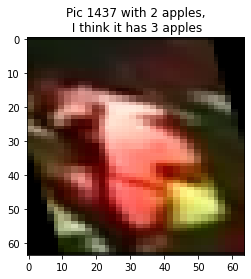

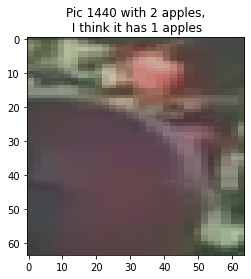

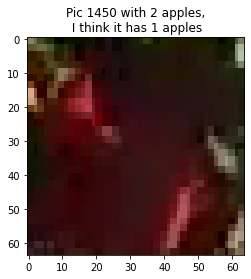

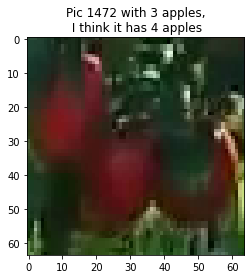

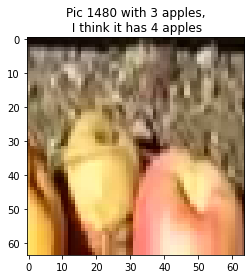

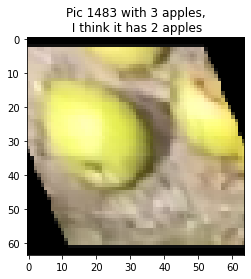

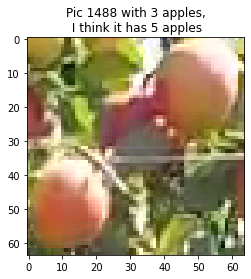

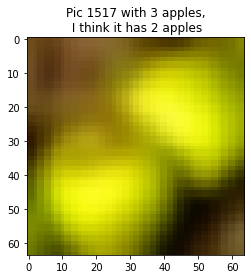

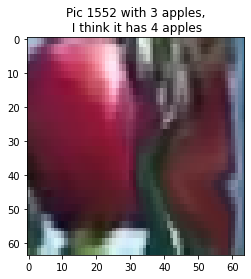

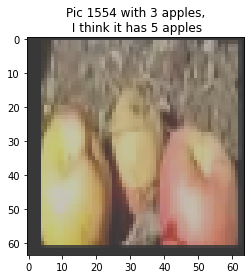

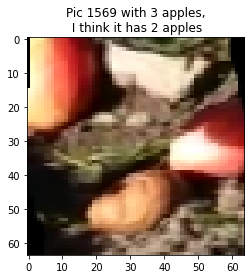

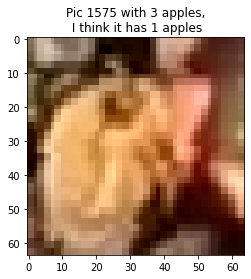

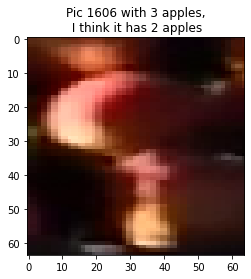

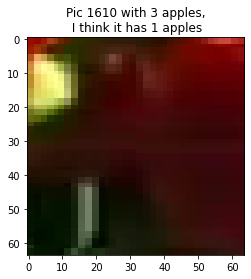

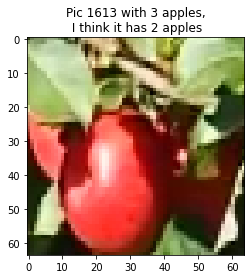

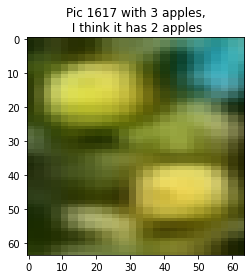

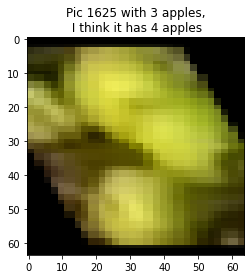

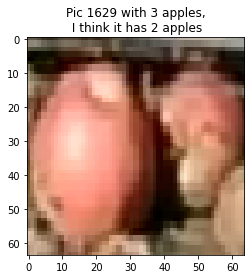

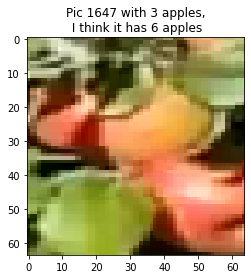

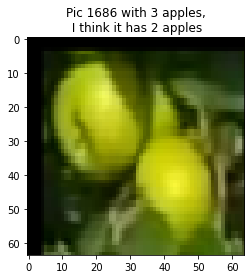

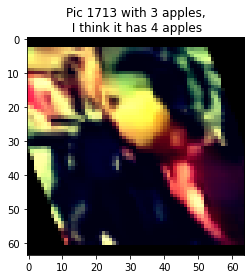

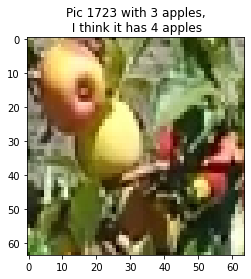

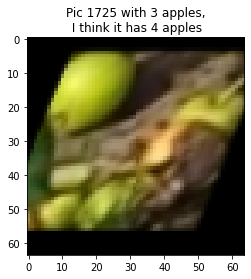

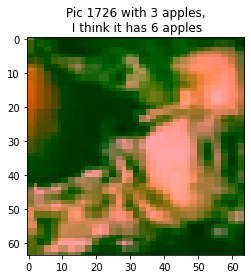

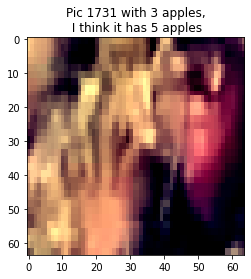

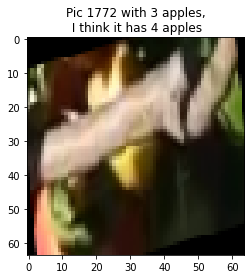

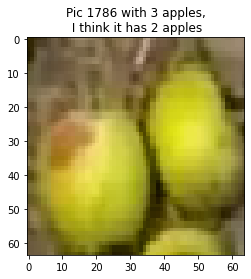

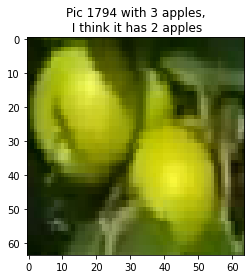

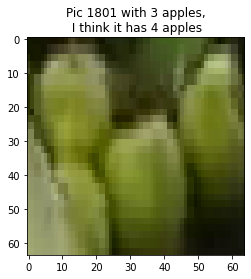

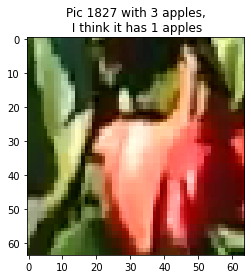

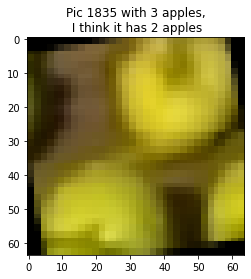

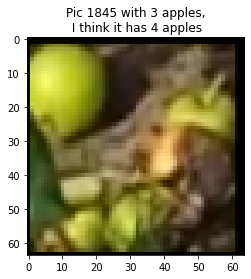

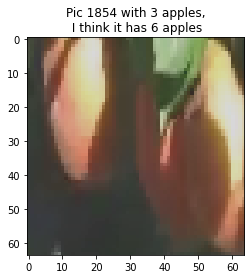

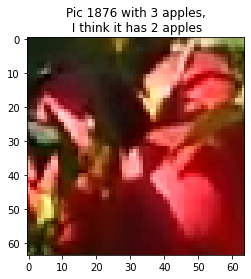

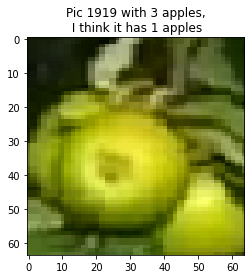

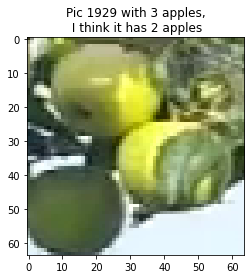

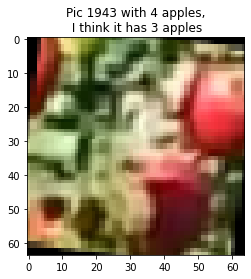

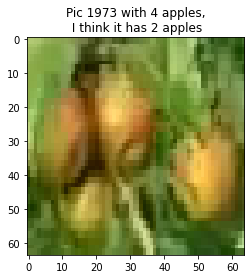

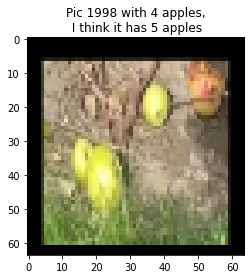

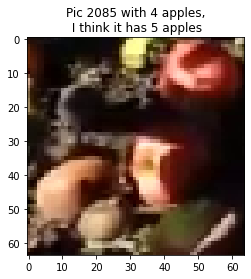

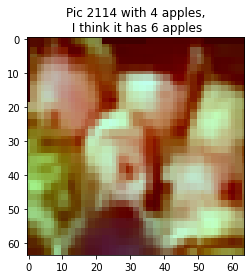

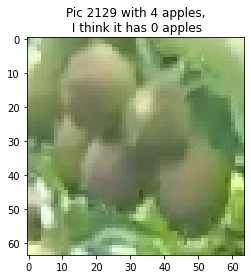

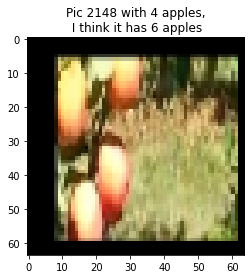

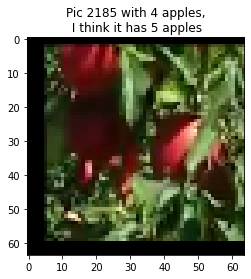

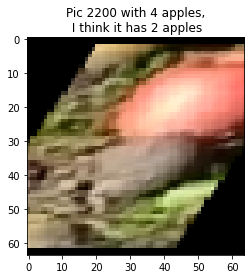

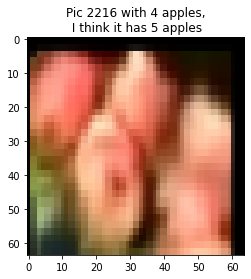

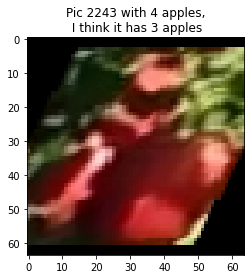

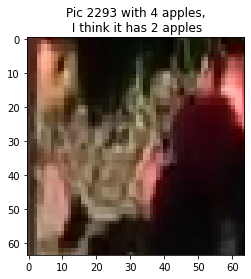

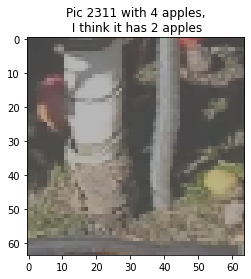

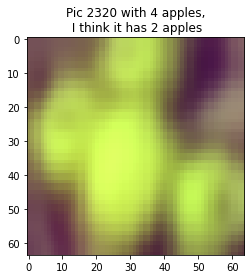

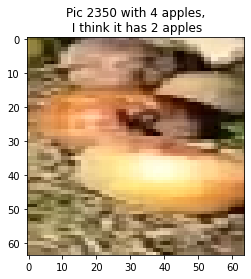

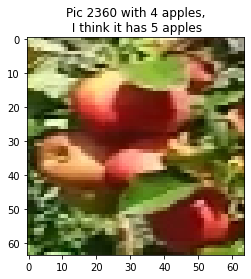

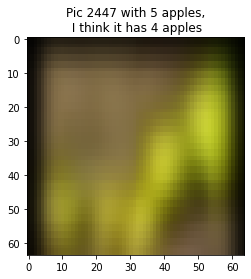

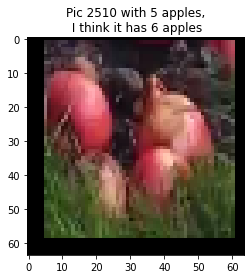

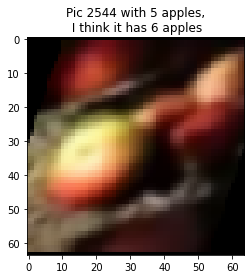

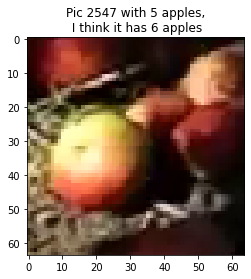

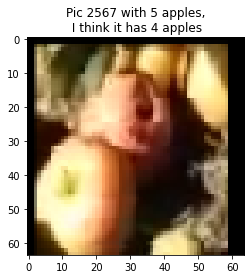

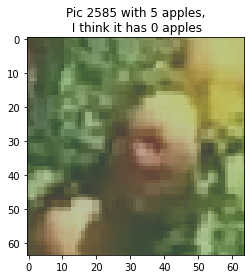

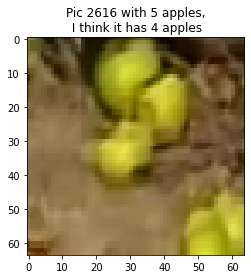

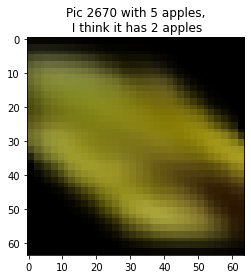

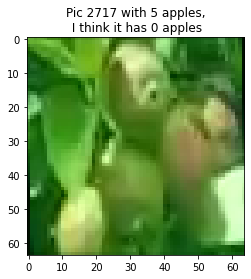

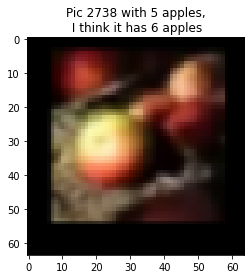

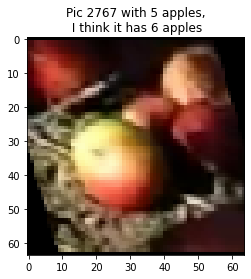

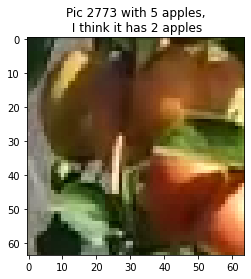

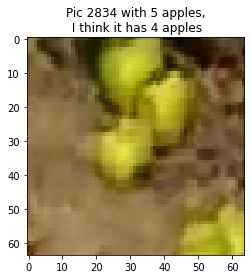

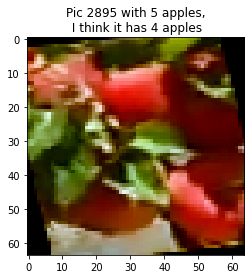

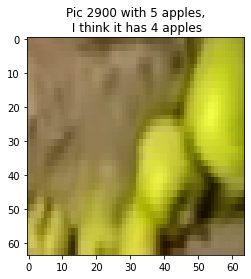

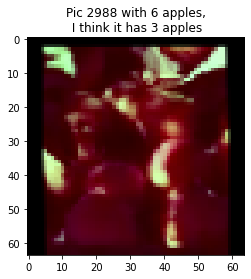

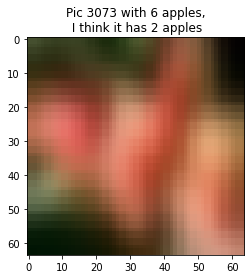

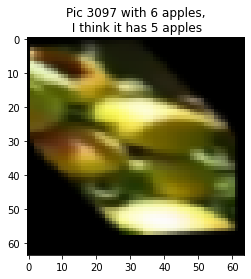

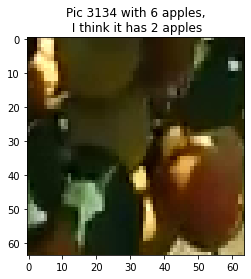

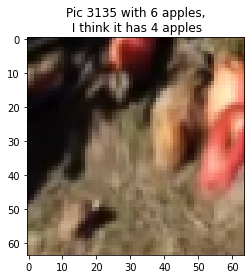

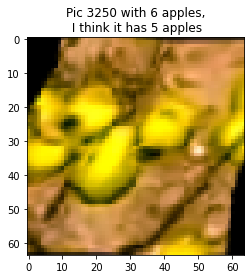

In [ ]:
for i in wrong_lst:
    # Grab an image from the data set
    sample_image = images_test[i]
    image_class_name = np.argmax(y_test[i])
    #image_name = df.Image[i*sub_div]
    #image_path = (apple_path + '/' + img_name)
    
    # Grab the image's expected class id
    #image_class_number = labels_test[i][0]
    # Look up the class name from the class id
    #image_class_name = cifar10_class_names[image_class_number]
  
    # Draw the image as a plot
    plt.imshow(sample_image, cmap=plt.cm.binary)
    # Label the image
    plt.title('Pic ' + str(i) + ' with ' + str(image_class_name) + ' apples,\n I think it has ' + str(np.argmax(predictions[i,:])) + ' apples')
    # Show the plot on the screen
    plt.show()